In [5]:
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [6]:
fnames = glob.glob("data/20230903*.json")
data = []
for fname in fnames:
    with open(fname) as f:
        data.append(json.load(f))


Tlist = np.array([d[0]["T_measured"] for d in data])
Tsortindx = np.argsort(Tlist)


In [7]:
Tlist[Tsortindx]

array([26.5787907, 26.6230717, 26.6682682, 26.7125187, 26.7561283,
       26.8008366, 26.8452702, 27.9102116, 28.3111515])

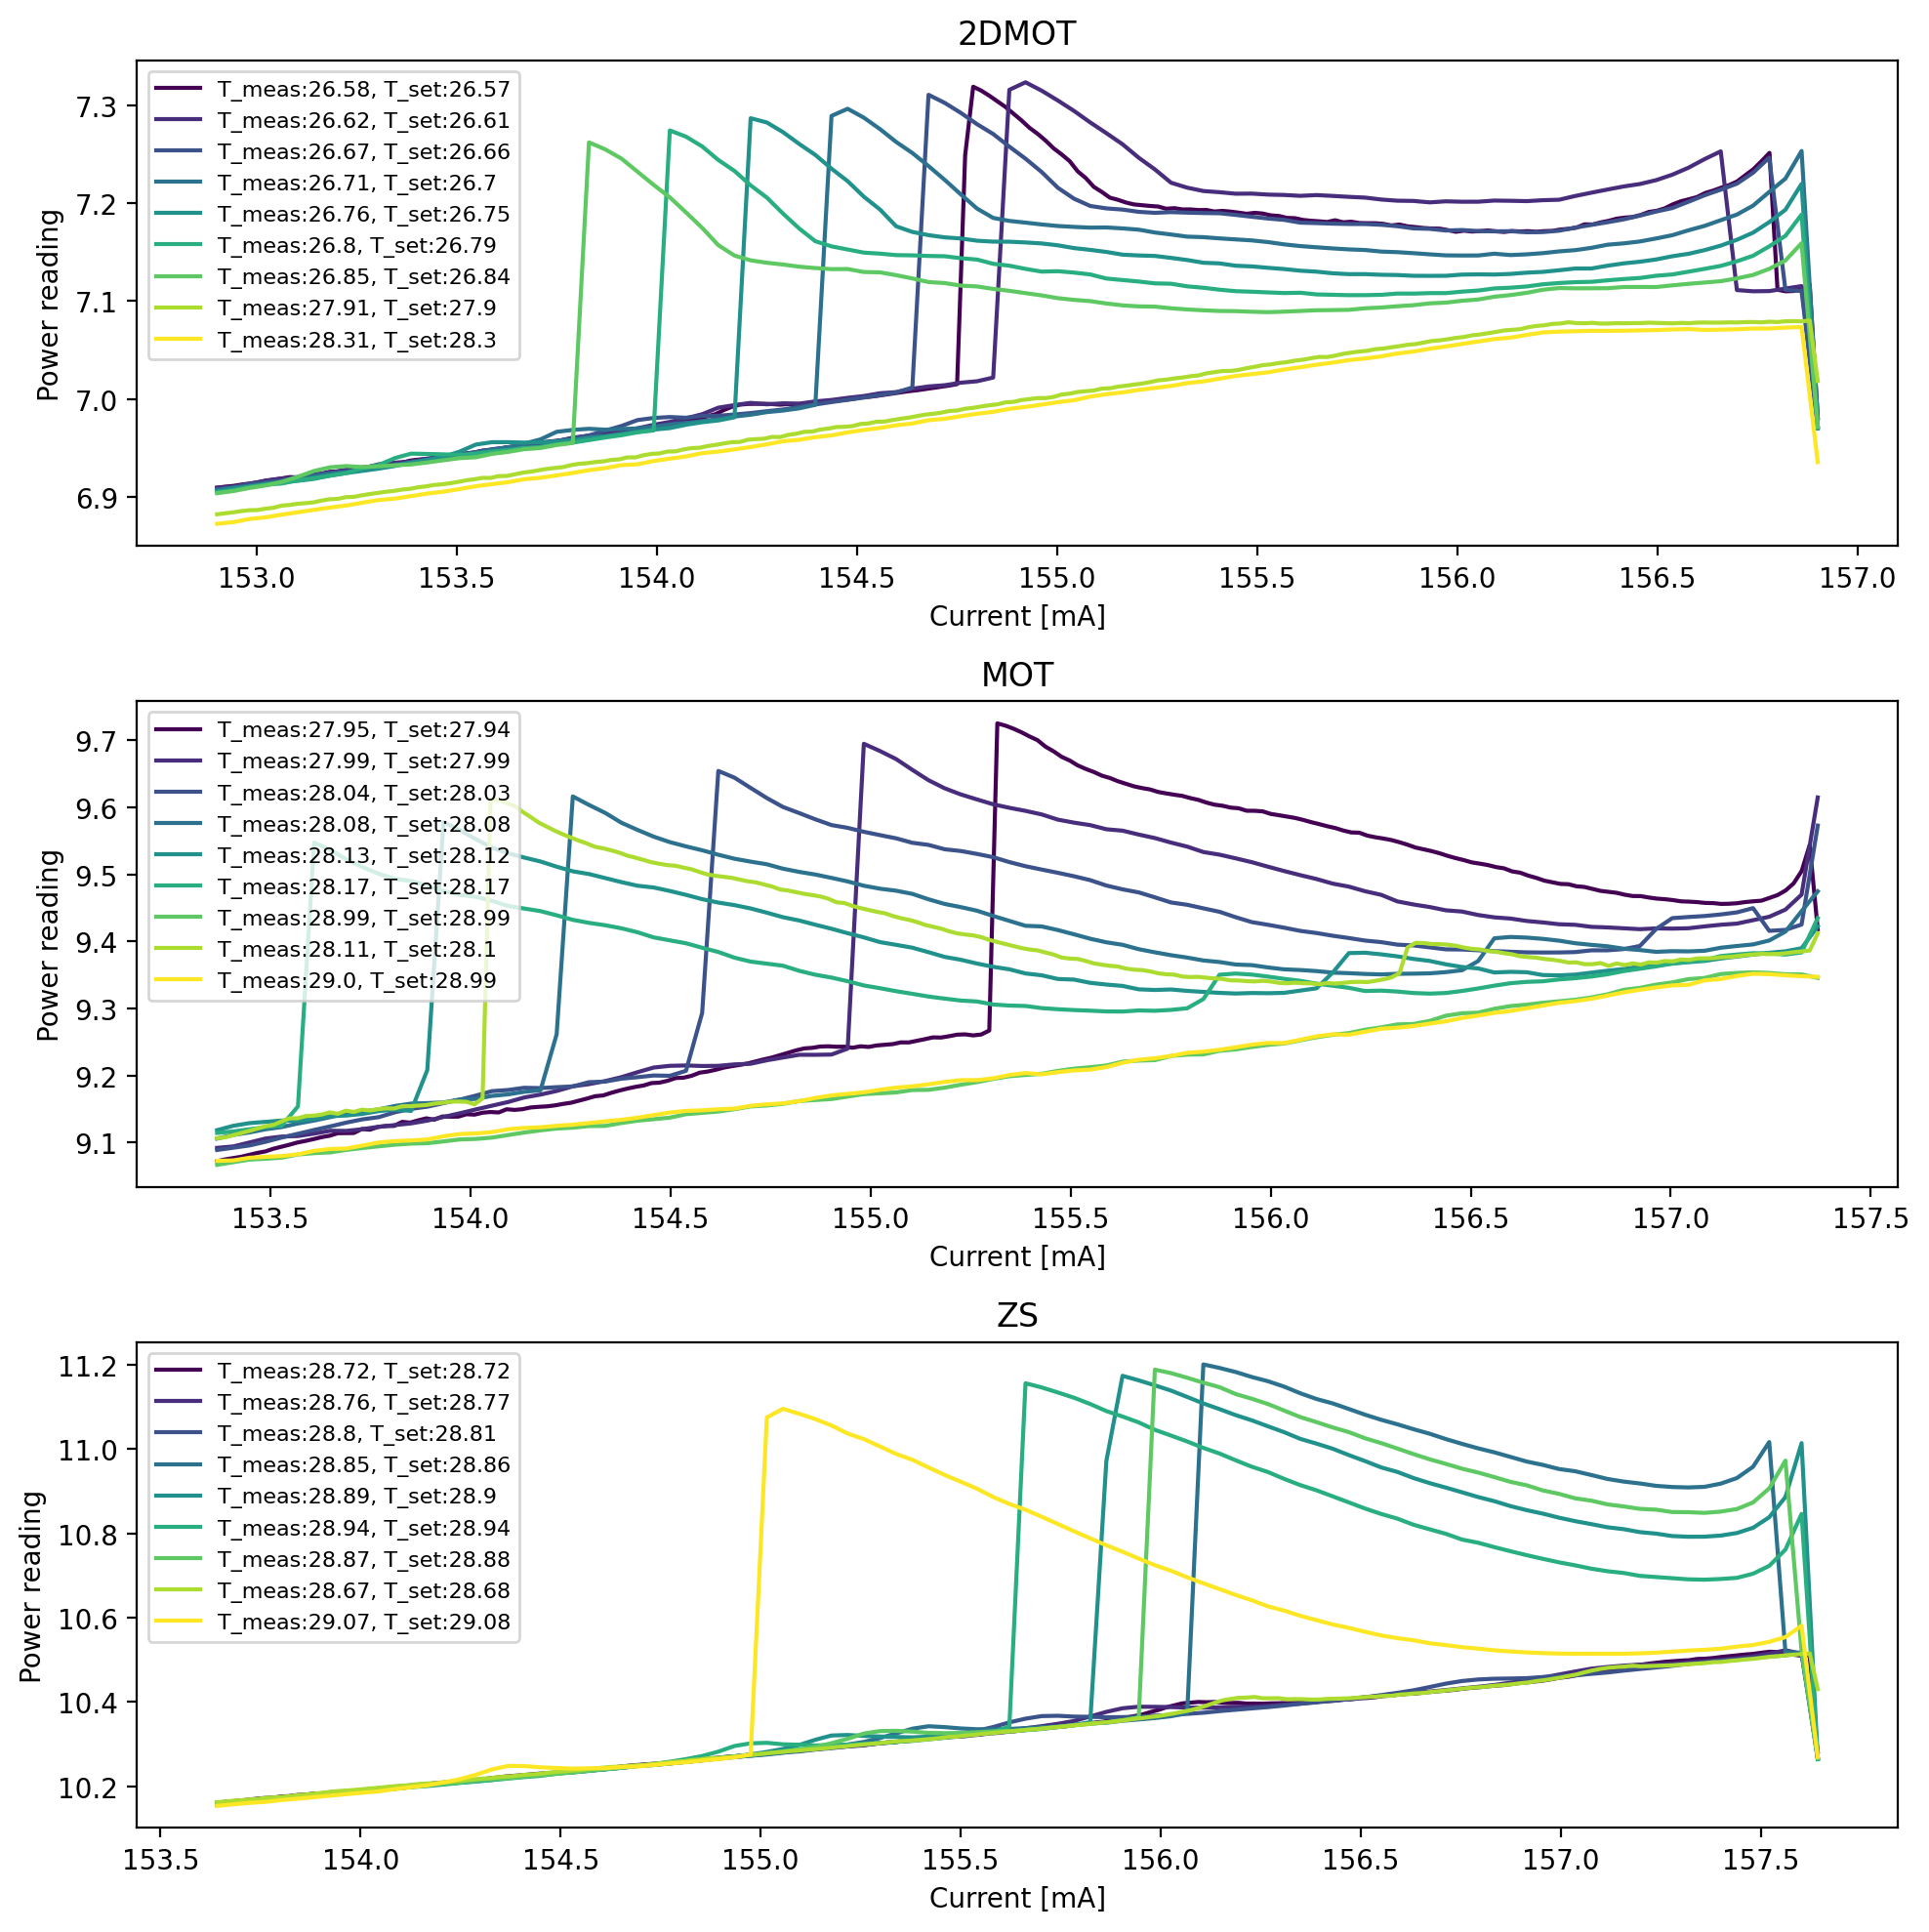

In [11]:
fig , axes = plt.subplots(3, 1, dpi=200, figsize=(10, 10))
viridis = mpl.cm.viridis(np.linspace(0,1, num=len(data)))
for jj in range(len(data)):
    d = Tsortindx[jj]
    ii = 0
    for channel in data[d]:
        axes[ii].plot(channel["I_measured"], channel["P_measured"], label=f"T_meas:{np.round(channel['T_measured'], decimals=2)}, T_set:{np.round(channel['T_set'], decimals=2)}", color=viridis[jj])
        axes[ii].set_title(channel["name"])
        axes[ii].set(xlabel="Current [mA]", ylabel="Power reading")
        axes[ii].legend(fontsize=8)
        ii += 1
fig.tight_layout()